In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
from helpers.log_helper import open_log
from helpers.plot_helper import plot_auto_engine_views, plot_partida
from helpers import df_helper
import pandas as pd

In [6]:
log = df_helper.EngineLog("golquadrado/logs/rodandoliso.msl", name="MeuLog", save_path="golquadrado/data/rodandoliso.csv")

In [7]:
df = log.df

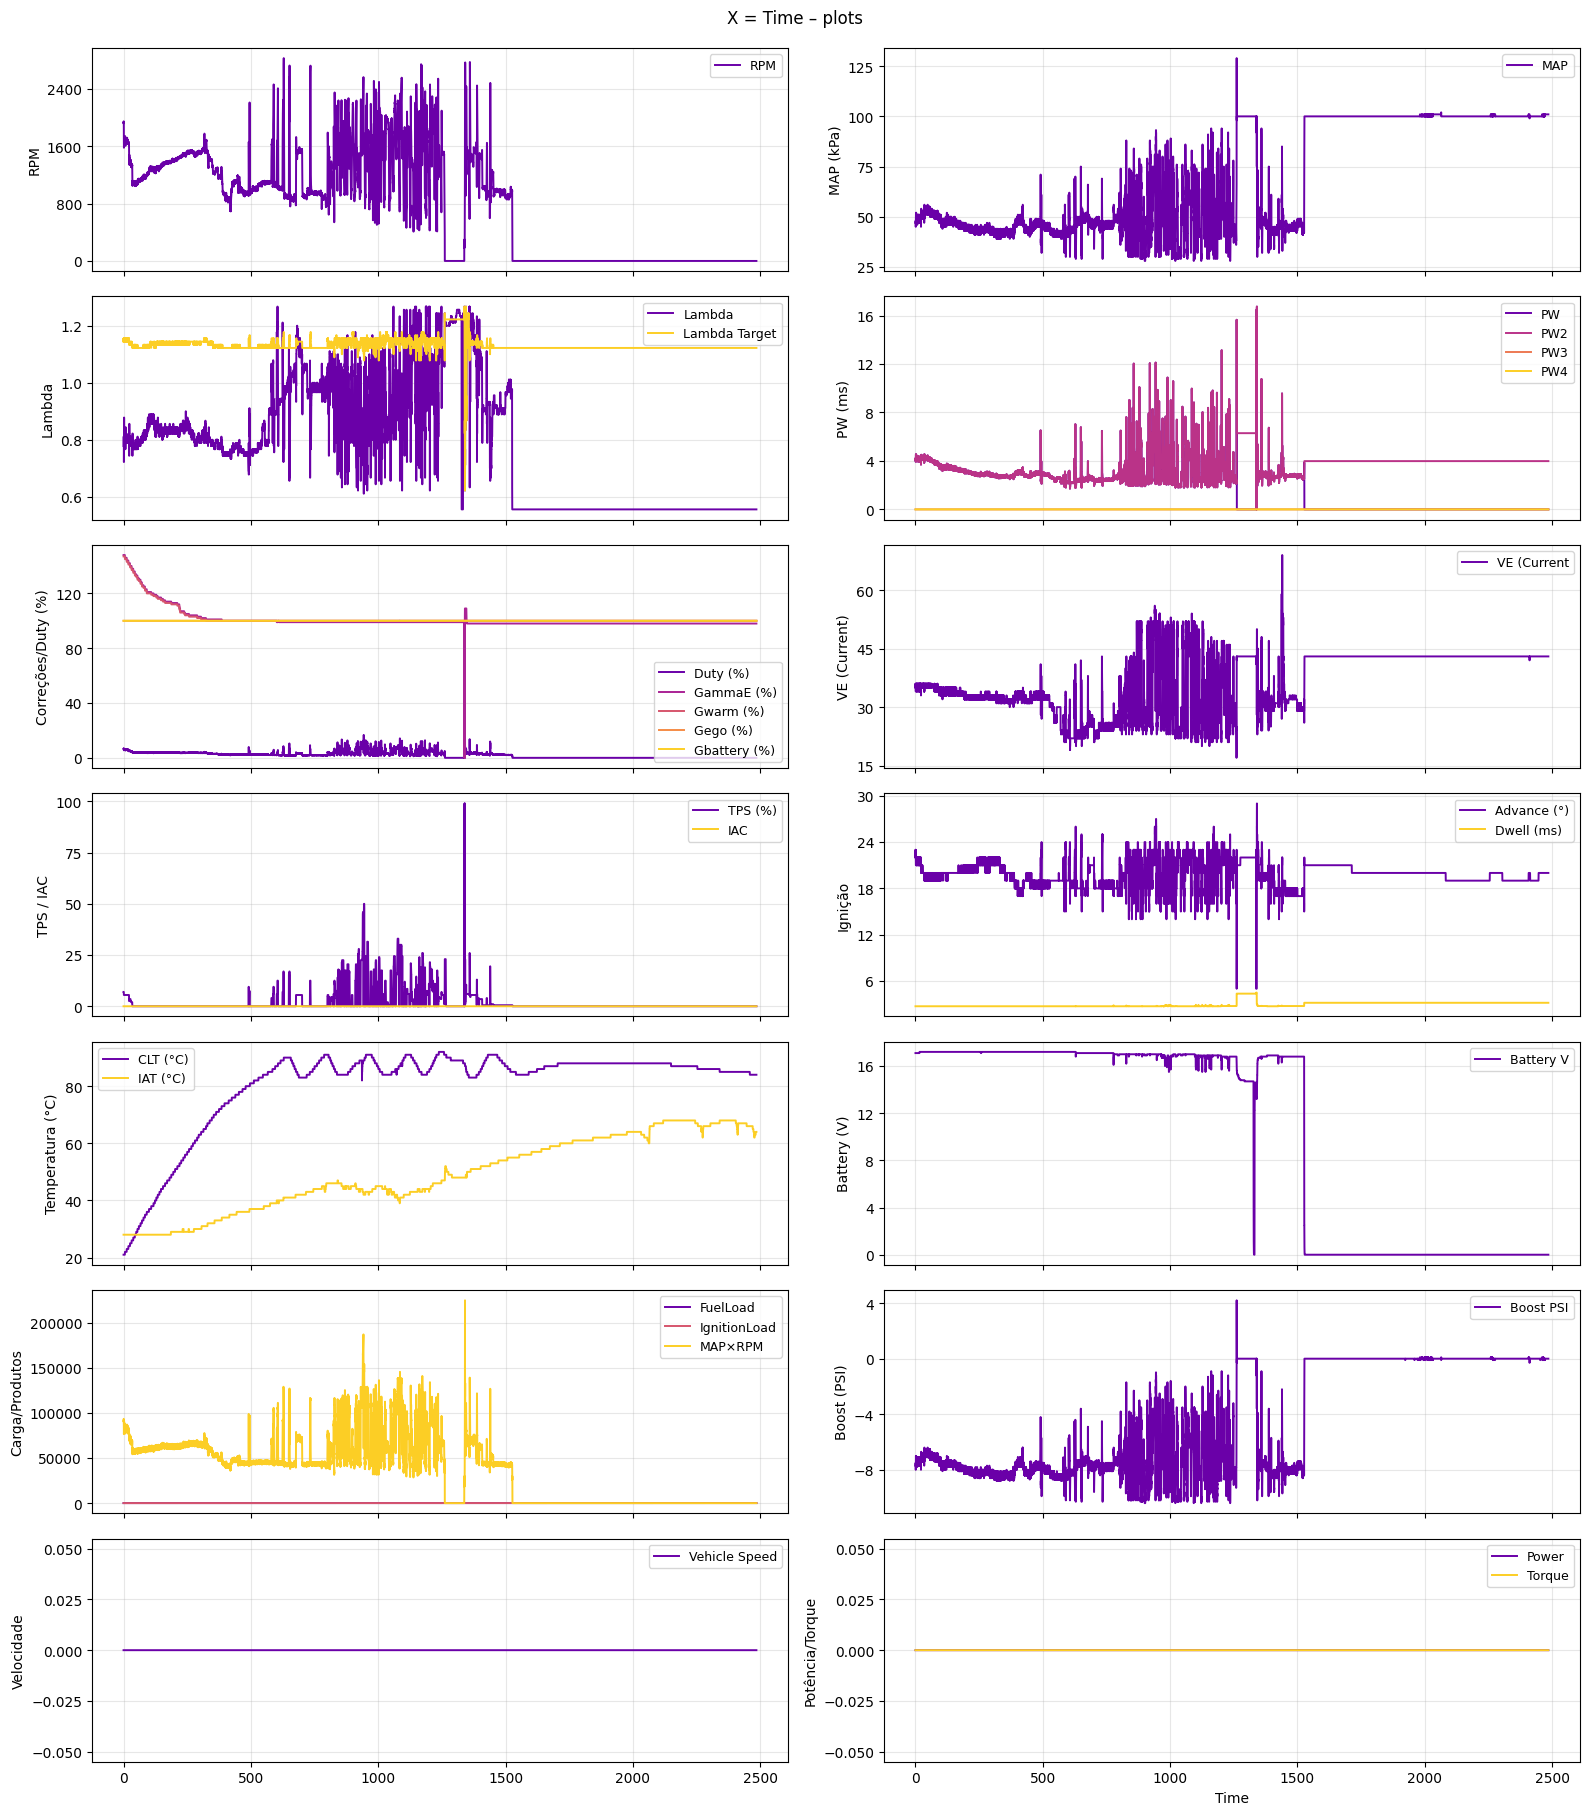

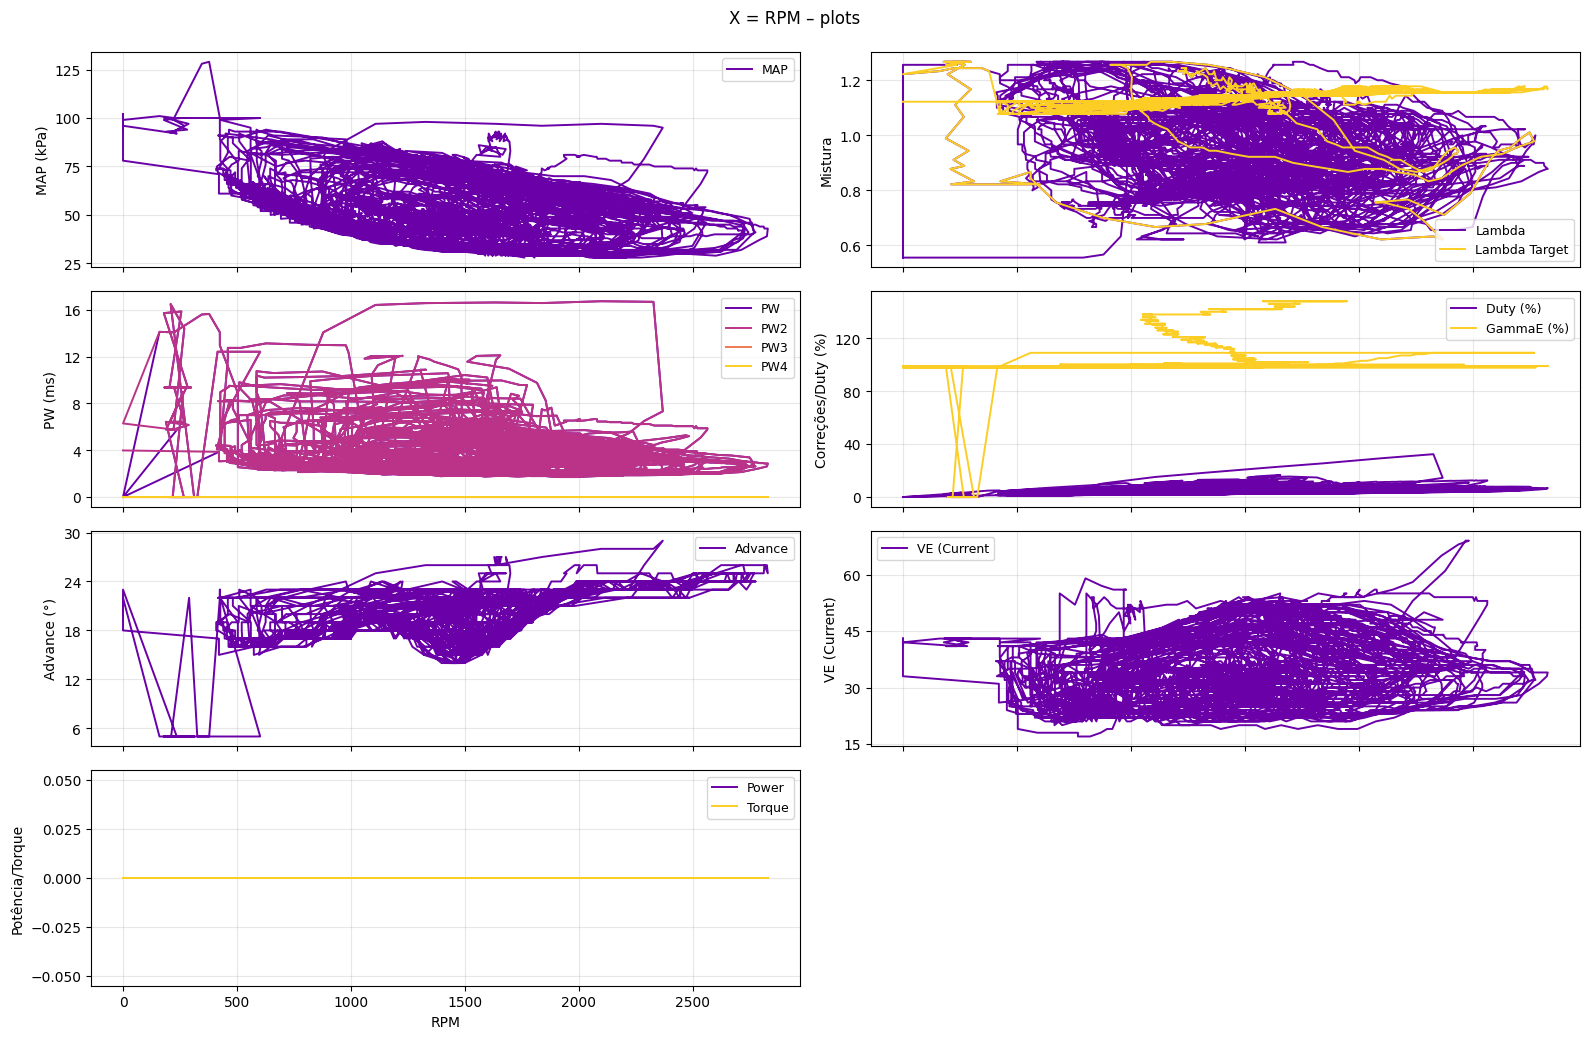

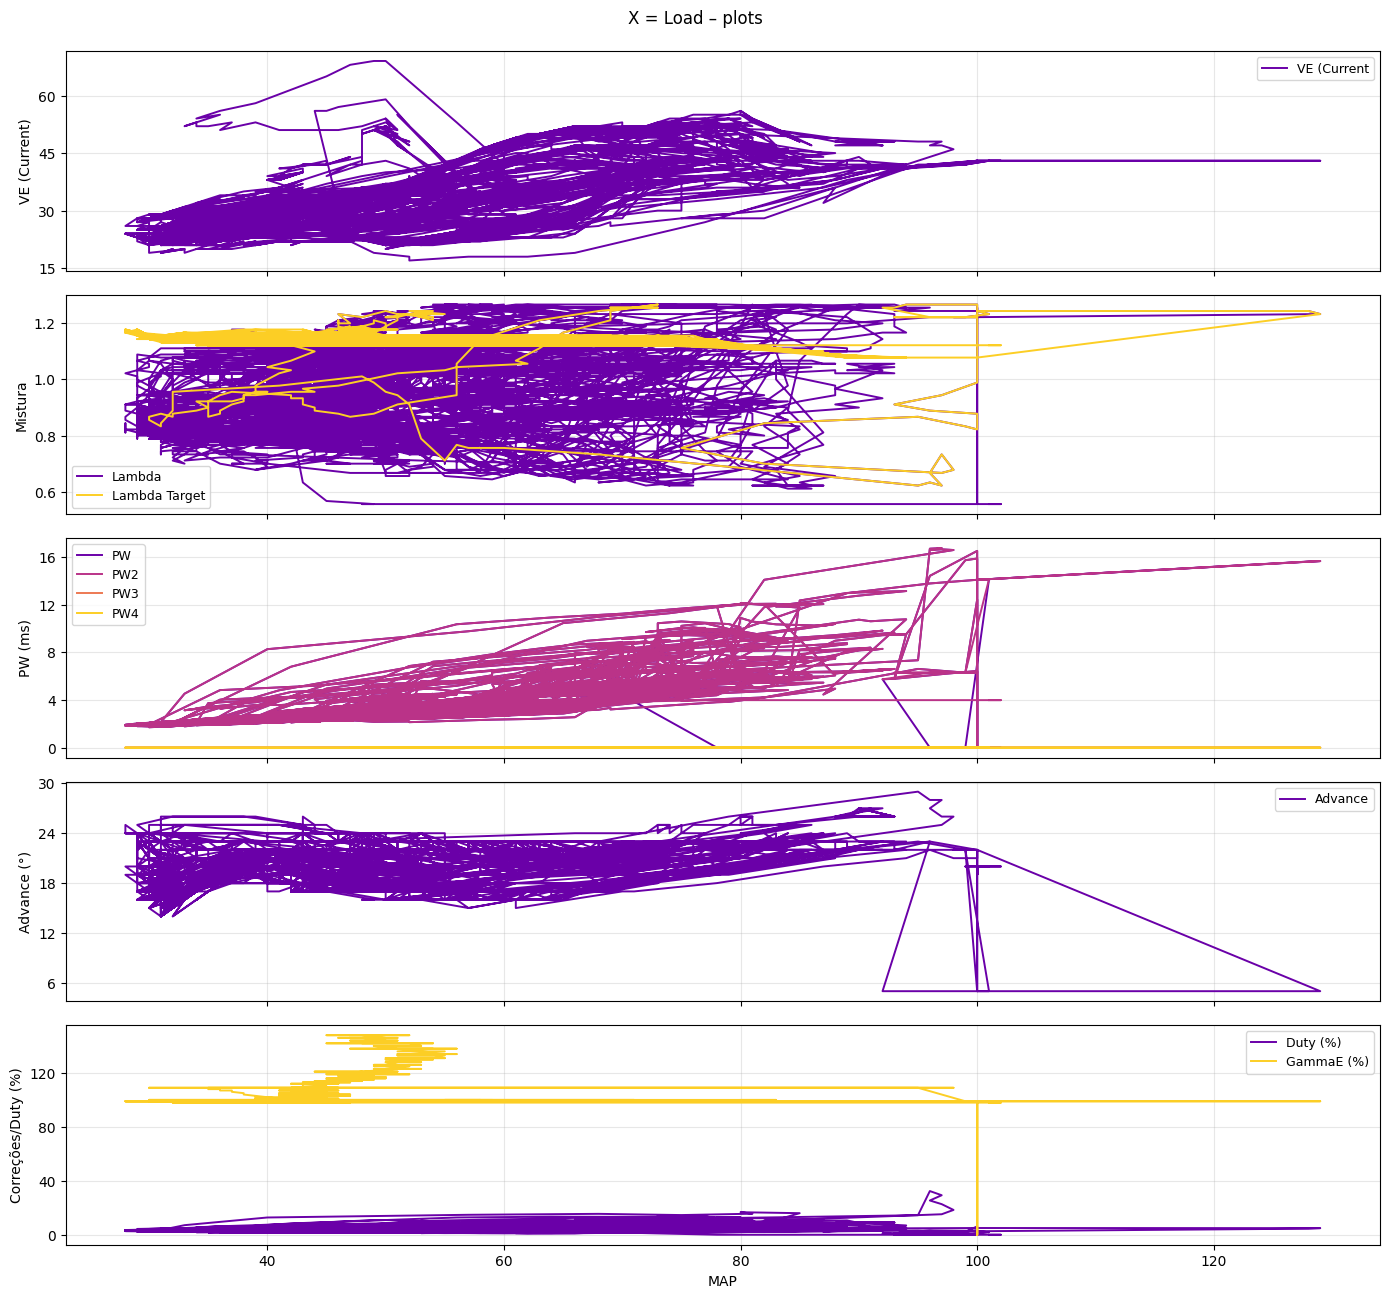

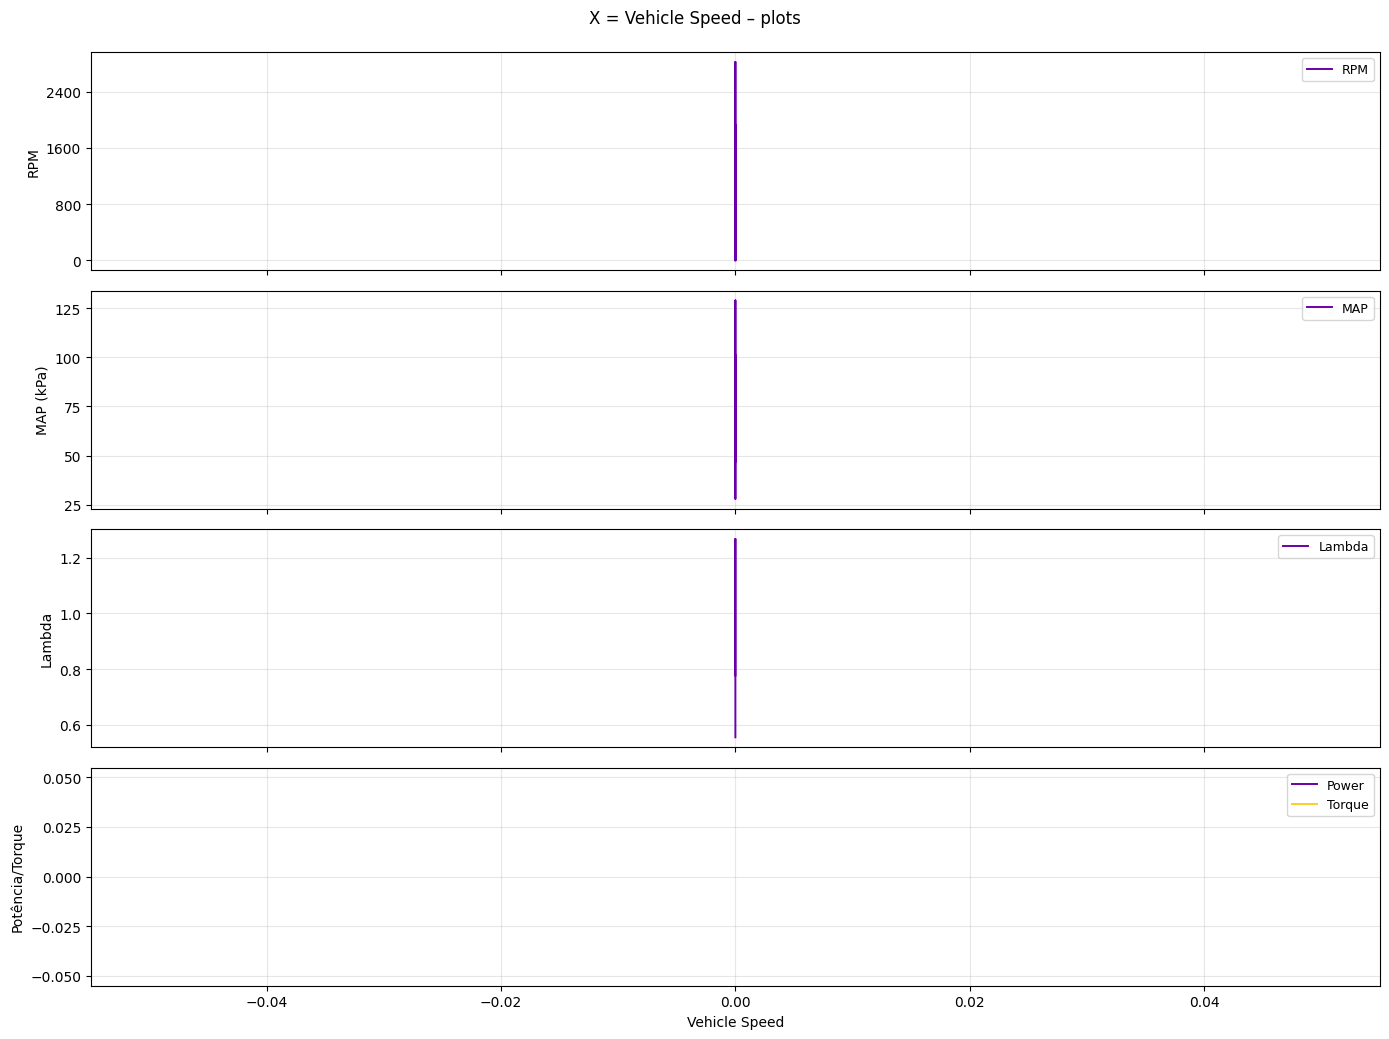

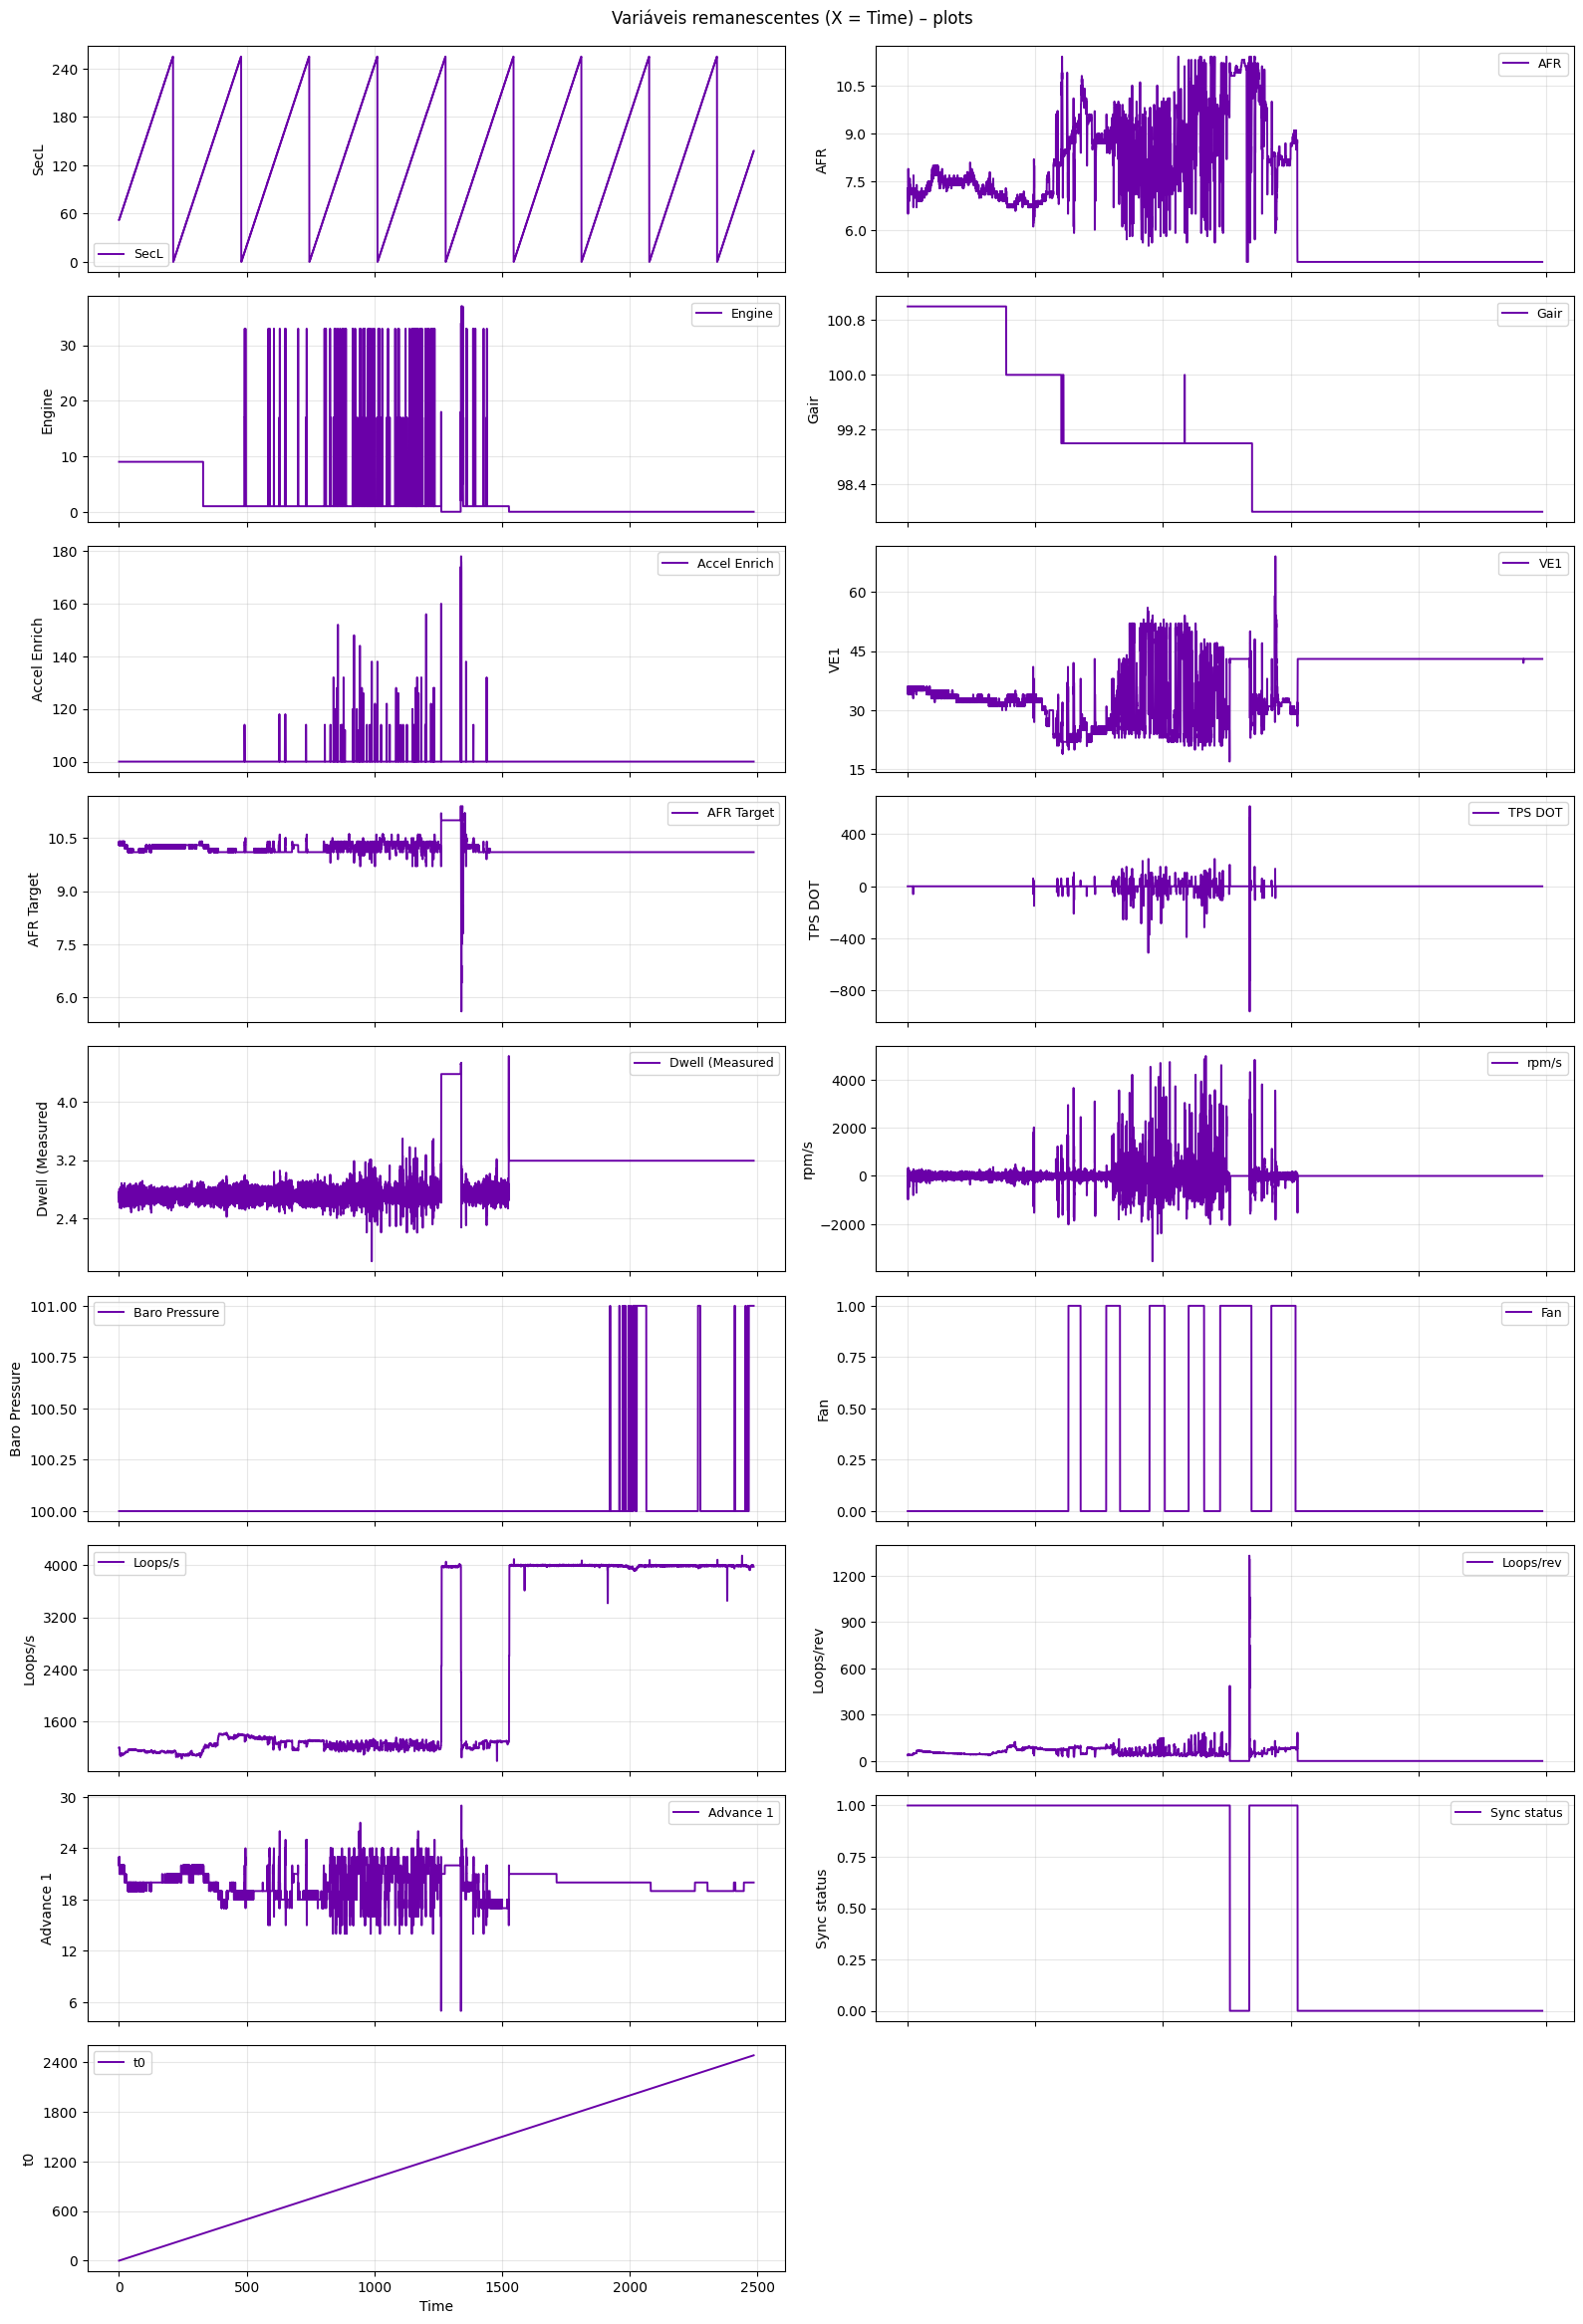

In [8]:
df.ecu.plot_auto(df_name="plots")

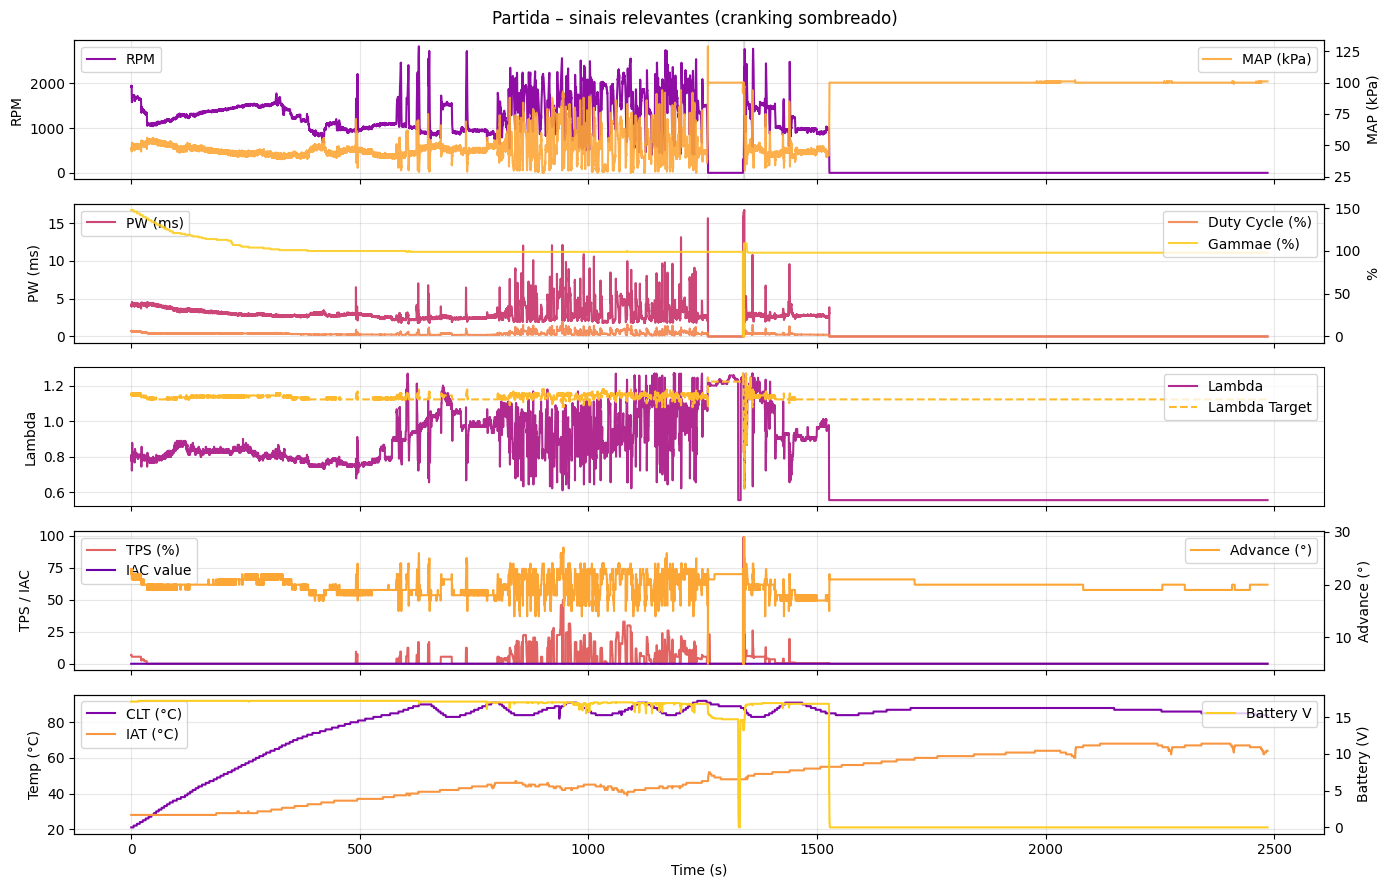

(<Figure size 1400x900 with 9 Axes>,
 array([<Axes: ylabel='RPM'>, <Axes: ylabel='PW (ms)'>,
        <Axes: ylabel='Lambda'>, <Axes: ylabel='TPS / IAC'>,
        <Axes: xlabel='Time (s)', ylabel='Temp (°C)'>], dtype=object))

In [9]:
df.ecu.plot_partida()

In [10]:
segs = df.ecu.segments(100)

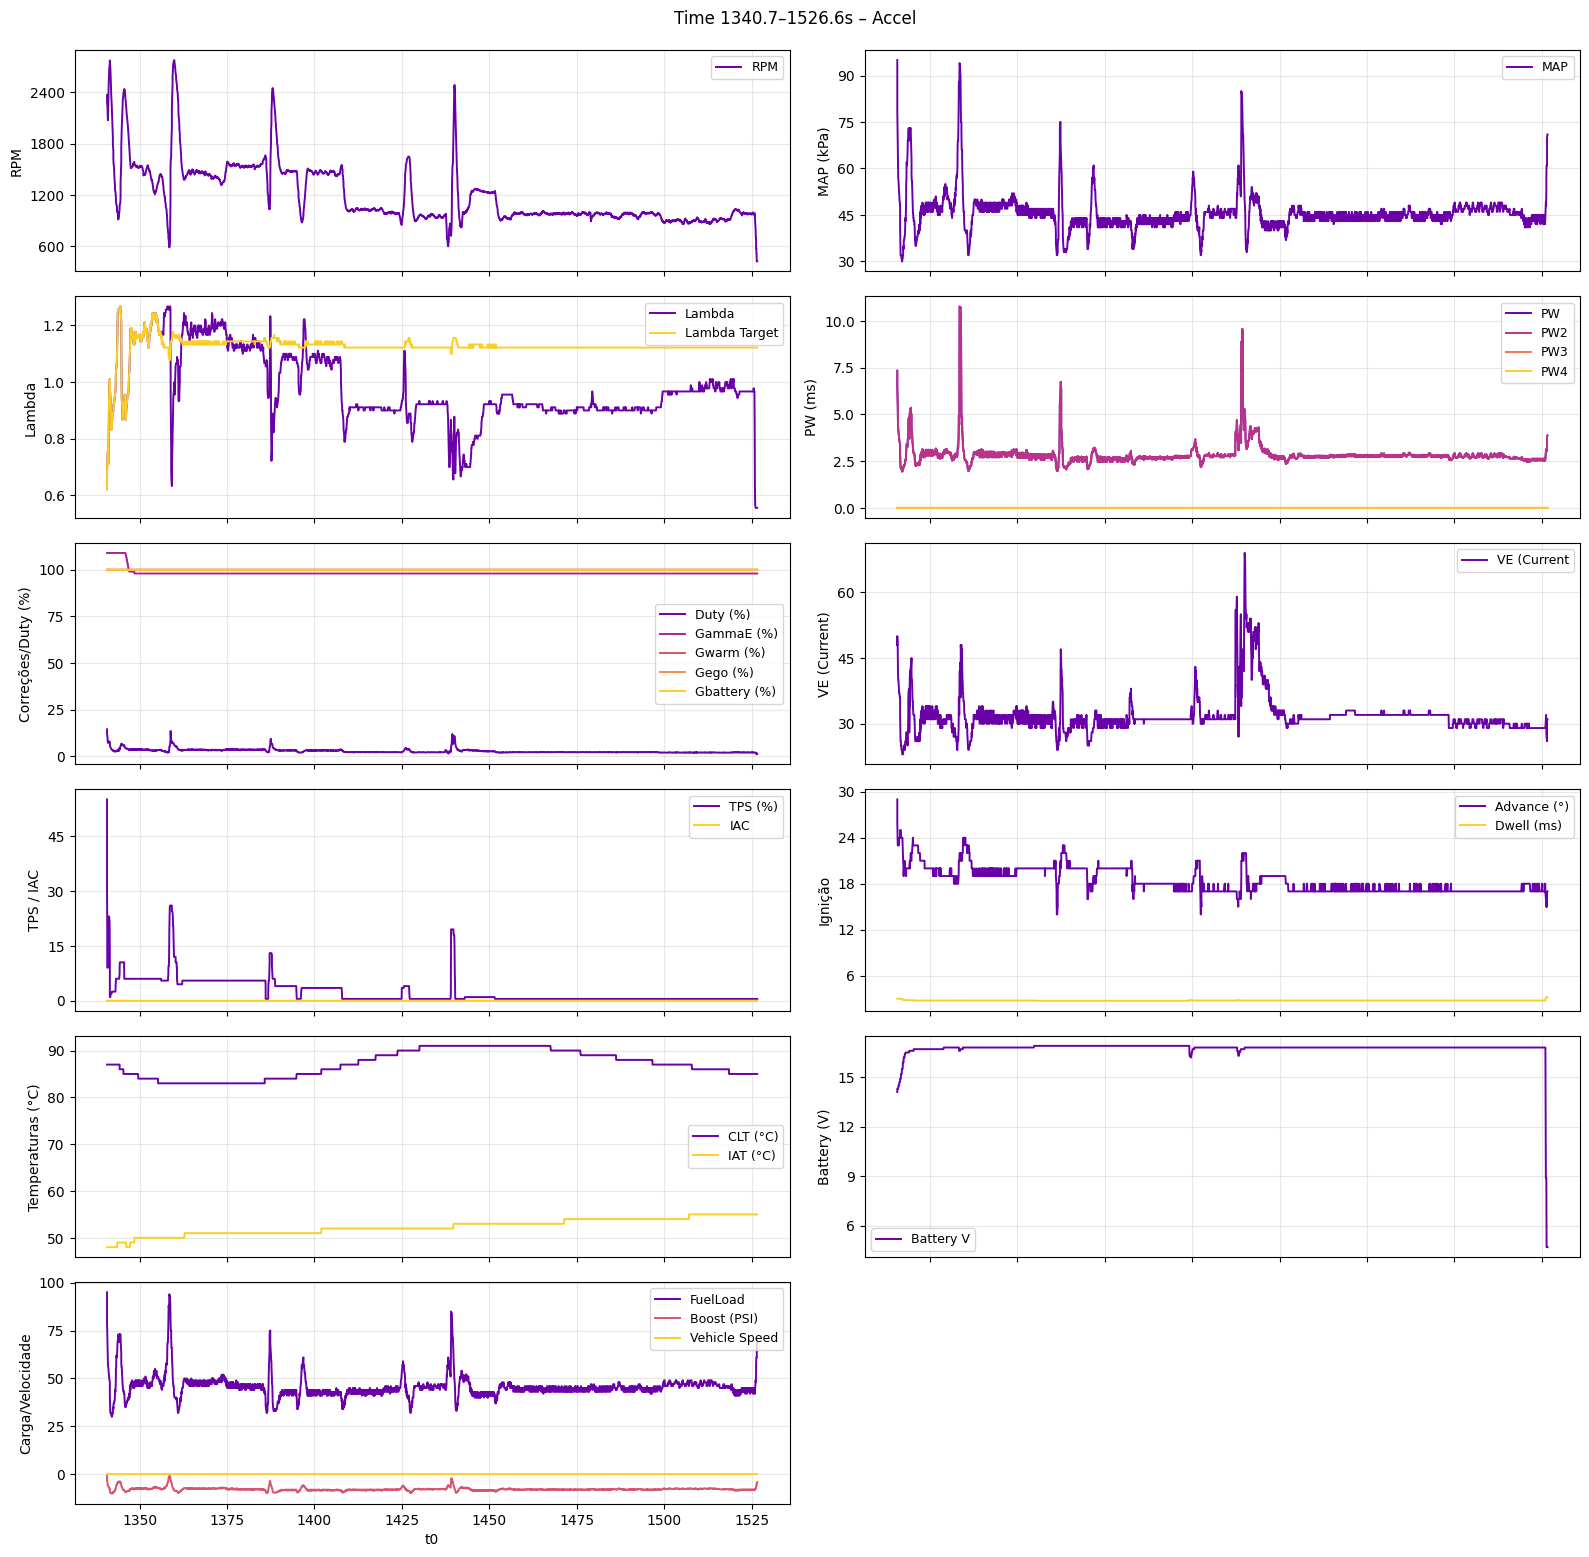

In [11]:
if segs: df.ecu.plot_range(segs[0]["t0"], segs[0]["t1"], df_name=segs[0]["state"])

/Users/vsalberice/Desktop/Personal/tokyodrift/helpers/df_helper.py:638: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  H = d.pivot_table(index=pd.cut(d["MAP"], map_bins),


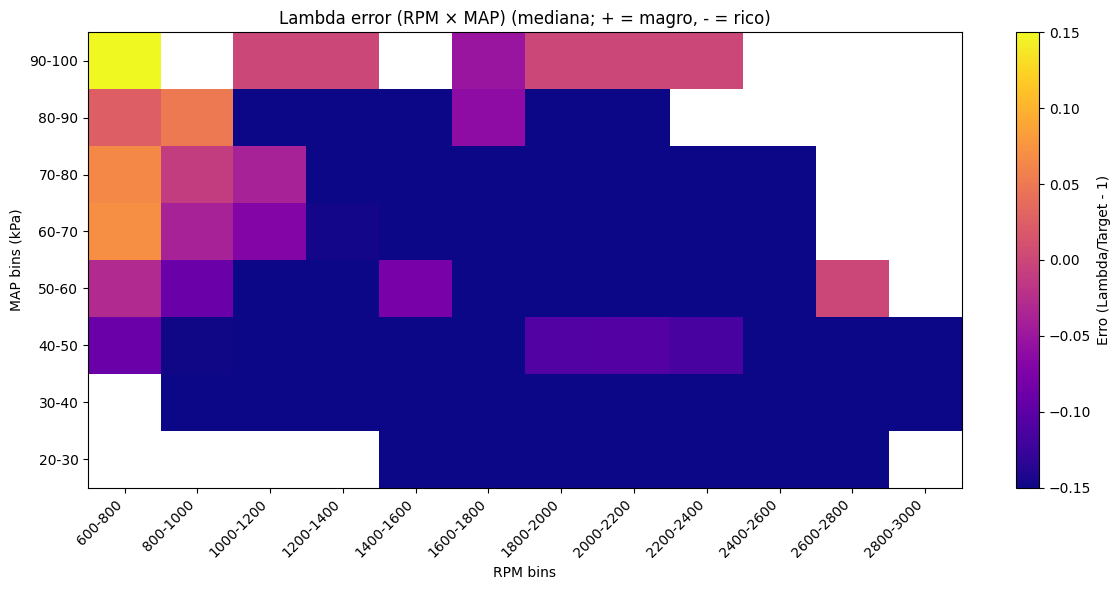

(<Figure size 1200x600 with 2 Axes>,
 <Axes: title={'center': 'Lambda error (RPM × MAP) (mediana; + = magro, - = rico)'}, xlabel='RPM bins', ylabel='MAP bins (kPa)'>)

In [12]:
df.ecu.plot_lambda_heatmap()

In [13]:
# New columns added by add_fuel_estimates():
# - fuel_flow_total_g_s: Total fuel flow in grams per second
# - fuel_mg_per_cyl: Fuel per cylinder per cycle in mg/cyl/cycle
# - inj_flow_actual_cc_min: Actual injector flow corrected for pressure differential

df = log.df.ecu.add_fuel_estimates(
    inj_flow_cc_min=200,   # IWP024 @ ~3 bar
    num_inj=4,
    n_cyl=4,
    fuel_density_g_cc=0.789,  # etanol puro
    inj_rated_dp_kpa=300,
    reg_ref="manifold"        # regulador referenciado ao coletor
)

# Verifique se as colunas apareceram:
print(df.columns.tolist())
print(df[['fuel_flow_total_g_s', 'fuel_mg_per_cyl']].head())

['Time', 'SecL', 'RPM', 'MAP', 'MAPxRPM', 'TPS', 'AFR', 'Lambda', 'IAT', 'CLT', 'Engine', 'DFCO', 'Gego', 'Gair', 'Gbattery', 'Gwarm', 'Gbaro', 'Gammae', 'Accel Enrich', 'VE (Current', 'VE1', 'VE2', 'PW', 'PW2', 'PW3', 'PW4', 'AFR Target', 'Lambda Target', 'Duty Cycle', 'Duty Cycle (Staging', 'TPS DOT', 'Advance (Current', 'Dwell', 'Dwell (Measured', 'Battery V', 'rpm/s', 'Error #', 'Error ID', 'Boost PSI', 'Boost cut', 'Hard Launch', 'Hard Limiter', 'Idle Control', 'IAC value', 'Baro Pressure', 'Fan', 'Sync Loss #', 'Loops/s', 'Loops/rev', 'Aux0', 'Aux1', 'Aux2', 'Aux3', 'Aux4', 'Aux5', 'Aux6', 'Aux7', 'Aux8', 'Aux9', 'Aux10', 'Aux11', 'Aux12', 'Aux13', 'Aux14', 'Aux15', 'Advance 1', 'Advance 2', 'FuelLoad', 'IgnitionLoad', 'Sync status', 'Engine Prot. RPM', 'Engine Prot. CLT', 'Trip Meter Miles', 'Odometer Miles', 'Vehicle Speed', 'Power', 'Torque', 't0', 'state', 'fuel_flow_per_inj_cc_s', 'fuel_dc_used', 'fuel_flow_total_cc_s', 'fuel_flow_total_g_s', 'fuel_mg_per_cyl', 'fuel_mg_per_

In [14]:
df

,Time,SecL,RPM,MAP,MAPxRPM,TPS,AFR,Lambda,IAT,CLT,...,Power,Torque,t0,state,fuel_flow_per_inj_cc_s,fuel_dc_used,fuel_flow_total_cc_s,fuel_flow_total_g_s,fuel_mg_per_cyl,fuel_mg_per_inj
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,EngineOff,3.333333,NaN,NaN,NaN,NaN,NaN
1,NaN,52.0,1930.0,47.0,90710.0,7.0,7.0,0.778,28.0,21.0,...,0.0,0.0,NaN,Accel,3.333333,0.066,0.880000,0.69432,10.792539,10.792539
2,0.042,52.0,1930.0,47.0,90710.0,7.0,7.0,0.778,28.0,21.0,...,0.0,0.0,0.000,Accel,3.333333,0.066,0.880000,0.69432,10.792539,10.792539
3,0.042,52.0,1925.0,47.0,90475.0,7.0,7.1,0.789,28.0,21.0,...,0.0,0.0,0.000,Accel,3.333333,0.066,0.880000,0.69432,10.820571,10.820571
4,0.096,52.0,1930.0,48.0,92640.0,7.0,7.1,0.789,28.0,21.0,...,0.0,0.0,0.054,Accel,3.333333,0.067,0.893333,0.70484,10.956062,10.956062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37251,2484.764,138.0,0.0,101.0,0.0,0.0,5.0,0.556,64.0,84.0,...,0.0,0.0,2484.722,EngineOff,3.333333,0.000,0.000000,0.00000,0.000000,0.000000
37252,2484.833,138.0,0.0,101.0,0.0,0.0,5.0,0.556,64.0,84.0,...,0.0,0.0,2484.791,EngineOff,3.333333,0.000,0.000000,0.00000,0.000000,0.000000
37253,2484.899,138.0,0.0,101.0,0.0,0.0,5.0,0.556,64.0,84.0,...,0.0,0.0,2484.857,EngineOff,3.333333,0.000,0.000000,0.00000,0.000000,0.000000
37254,2484.966,138.0,0.0,101.0,0.0,0.0,5.0,0.556,64.0,84.0,...,0.0,0.0,2484.924,EngineOff,3.333333,0.000,0.000000,0.00000,0.000000,0.000000
